In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
dataset = pd.read_csv("/home/aswnss/Coding/Python/Machine-Learning-Projects/ras ml/datasets/House_Data_BNG.csv")
dataset

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
dataset.groupby('area_type')['area_type'].agg('count') #Aggregate based on count

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
dataset.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [5]:
dataset.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
dataset_cpy1 = dataset.drop(['area_type','availability','society','balcony'],axis=1)
print(dataset_cpy1)

                       location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]


In [7]:
dataset_cpy2 = dataset_cpy1.dropna(axis=0) # remove rows with nullvalues
print(dataset_cpy2,"\nNull Values: ", dataset_cpy2.isna().sum())

                       location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13246 rows x 5 columns] 
Null Values:  location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


In [8]:
dataset_cpy2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
# we are converting this size into BHK column (feature engineering)
dataset_cpy2['BHK'] = dataset_cpy2['size'].apply(lambda x: int(x.split()[0]))

/tmp/ipykernel_6364/3269970018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cpy2['BHK'] = dataset_cpy2['size'].apply(lambda x: int(x.split()[0]))


In [10]:
dataset_cpy2

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [11]:
dataset_cpy2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
dataset_cpy2[dataset_cpy2['BHK']>10]

,location,size,total_sqft,bath,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [13]:
dataset_cpy2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def checkval(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
dataset_cpy2[~dataset_cpy2.total_sqft.apply(checkval)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def handle_ranges(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        output = (float(tokens[0]) + float(tokens[1])) / 2
        return output
    try:
        return float(x)
    except:
        return None
    
    

In [17]:
dataset_cpy3 = dataset_cpy2.copy()
dataset_cpy3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [18]:
dataset_cpy3['total_sqft'] = dataset_cpy3['total_sqft'].apply(handle_ranges)

In [19]:
dataset_cpy3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [20]:
dataset_cpy4 = dataset_cpy3.copy()

In [21]:
dataset_cpy4['price_per_sqft'] = dataset_cpy4['price']*100000/dataset_cpy4['total_sqft']


In [22]:
dataset_cpy4.dropna()
dataset_cpy4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Checking Location

In [23]:
len(dataset_cpy4.location.unique())

1304

In [24]:
dataset_cpy4.location = dataset_cpy4['location'].apply(lambda x: x.strip())

In [25]:
insights_locations = dataset_cpy4['location'].value_counts(ascending= False)
insights_locations

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [26]:
len(insights_locations[insights_locations >10])

241

In [27]:
locations_less_than_10 = insights_locations[insights_locations <=10]

In [28]:
dataset_cpy4.location = dataset_cpy4.location.apply(lambda x : 'other' if x in locations_less_than_10 else x)

In [29]:
len(dataset_cpy4.location.unique())

242

In [30]:
dataset_cpy4.isna().sum()

location           0
size               0
total_sqft        46
bath               0
price              0
BHK                0
price_per_sqft    46
dtype: int64

## Outliers


In [31]:
dataset_cpy4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
dataset_cpy5 = dataset_cpy4[~(dataset_cpy4.total_sqft/dataset_cpy4.BHK <300)]
dataset_cpy5

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [38]:
x = dataset_cpy5.groupby('location').sum()
x

,total_sqft,bath,price,BHK,price_per_sqft
location,,,,,
1st Block Jayanagar,19150.00,31.0,2541.000,32,1.235925e+05
1st Phase JP Nagar,41416.00,71.0,4027.500,69,2.237073e+05
2nd Phase Judicial Layout,12906.00,23.0,508.000,27,4.453571e+04
2nd Stage Nagarbhavi,19150.00,42.0,2431.000,41,1.294315e+05
5th Block Hbr Layout,14788.00,22.0,878.000,24,4.635484e+04
...,...,...,...,...,...
Yelahanka,364088.50,504.0,17248.285,515,1.067003e+06
Yelahanka New Town,46190.00,73.0,3404.500,81,2.227051e+05
Yelenahalli,16490.00,28.0,660.390,29,5.216316e+04


In [39]:
dataset_cpy5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### one standard deviation of the mean
If the data behaves in a normal curve, then 68% of the data points will fall within one standard deviation of the average, or mean, data point. Larger variances cause more data points to fall outside the standard deviation. Smaller variances result in more data that is close to average.

In [43]:
def outliers_rm_price_sqft(data):
    data_to_return = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        mean = np.mean(subdata.price_per_sqft)
        stdv = np.std(subdata.price_per_sqft)
        reduced_data = subdata[(subdata.price_per_sqft > (mean-stdv)) &(subdata.price_per_sqft <= (mean+stdv) )]
        data_to_return = pd.concat([data_to_return,reduced_data],ignore_index = True)
    return data_to_return

In [45]:
dataset_cpy6 = outliers_rm_price_sqft(dataset_cpy5)
dataset_cpy6.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [47]:
def scatter_plot(data,location):
    bhk2 = data[(data.location == location)& (data.BHK==2)]
    bhk3 = data[(data.location == location)& (data.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue')
    plt.scatter(bhk3.total_sqft,bhk3.price,color = 'red')
    plt.xlabel("SQFT AREA")
    plt.ylabel("Price lakhs")
    plt.show()

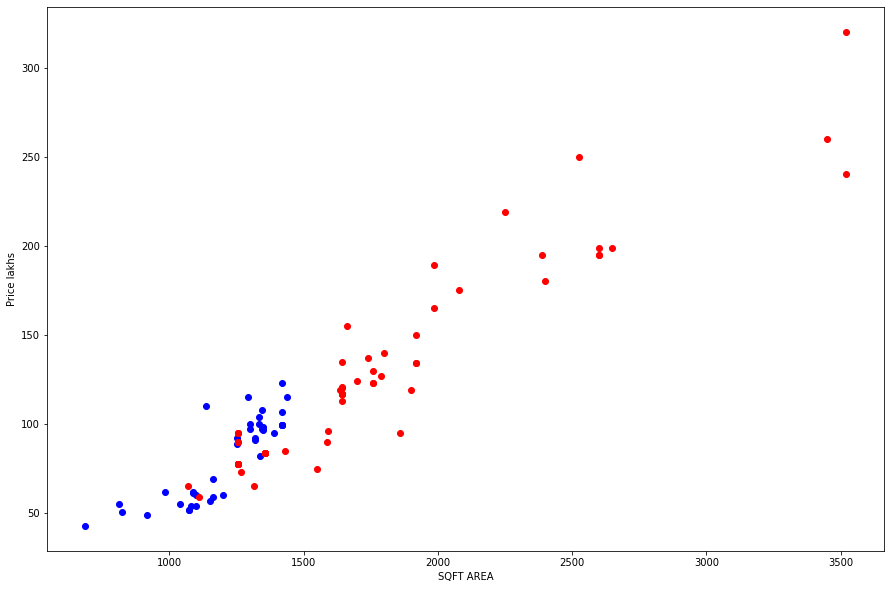

In [55]:
scatter_plot(dataset_cpy6,'Hebbal')

In [49]:
def ter_outliers_bhk(data):
    rem_indices = np.array([])
    for location, location_data in data.groupby('location'):
        BHK_stats = {}
        for bhk, bhk_data in location_data.groupby('BHK'):
            BHK_stats[bhk] = {
                    'mean' : np.mean(bhk_data.price_per_sqft),
                    'std': np.std(bhk_data.price_per_sqft),
                    'count' : bhk_data.shape[0]
                }
        for bhk, bhk_data in location_data.groupby('BHK'):
            stat_bhk = BHK_stats.get(bhk-1)
            if stat_bhk and stat_bhk['count']>5:
                rem_indices = np.append(rem_indices,bhk_data[bhk_data.price_per_sqft<(stat_bhk['mean'])].index.values)
        return data.drop(rem_indices, axis='index')

In [57]:
dataset_cpy7 = ter_outliers_bhk(dataset_cpy6)
print(dataset_cpy6.shape,dataset_cpy7.shape)

(10241, 7) (10241, 7)


In [58]:
dataset_cpy7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [59]:
dataset_cpy7[dataset_cpy7.bath > 7]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
293,Abbigere,8 Bedroom,3000.0,8.0,150.0,8,5000.000000
1296,Bommanahalli,8 Bedroom,3000.0,8.0,140.0,8,4666.666667
3028,Hennur Road,8 Bedroom,5000.0,8.0,250.0,8,5000.000000
3245,Horamavu Banaswadi,6 Bedroom,3800.0,8.0,200.0,6,5263.157895
3517,Indira Nagar,8 Bedroom,3250.0,8.0,600.0,8,18461.538462
3775,KR Puram,9 BHK,4600.0,9.0,200.0,9,4347.826087
5113,Mico Layout,9 BHK,5000.0,9.0,210.0,9,4200.000000
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [64]:
dataset_cpy8 = dataset_cpy7[~(dataset_cpy7.bath >(dataset_cpy7.BHK + 2))]
dataset_cpy8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [65]:
dataset_cpy9 = dataset_cpy8.drop(['size','price_per_sqft'],axis=1)

In [67]:
dummy_set = pd.get_dummies(dataset_cpy9.location)
dummy_set

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dataset_cpy10 = dataset_cpy9.concat()